In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import amino_acid_data
from matplotlib.lines import Line2D
from colors import colors

In [2]:
# Use LaTeX to write all texts

mpl.rc('figure')

mpl.rcParams['text.usetex'] = True
mpl.rcParams[
    'text.latex.preamble'] = r'\usepackage[cm]{sfmath}\usepackage{amsmath}\usepackage{amssymb}'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif'

font_size = 10

fonts = {
    "axes.labelsize": font_size,
    "font.size": font_size,
    "legend.fontsize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "axes.titlesize": font_size,
}

mpl.rcParams.update(fonts)

axes_settings = {
    "axes.labelcolor": '#202020',
    "axes.spines.top": False,
    "axes.spines.right": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": '#202020',
    "ytick.color": '#202020',
    "text.color": '#202020',
    "axes.edgecolor": '#202020',
}
mpl.rcParams.update(axes_settings)

mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.4


pos_col = colors['teal'][5]
neg_col = colors['teal'][9]
hypho_col = colors['orange'][9]
hyphil_col = colors['orange'][5]


umami_color = 'tab:blue'
bitter_color = 'tab:grey'

pred_ovlp_col = 'tab:red'
baseline_ovlp_col = colors['gray'][9]
rand_ovlp_col = colors['gray'][6]

ebar_color = 'black'

color_dict = {'-': neg_col, '+': pos_col, 'P': hyphil_col, 'H': hypho_col}
label_dict = {
    '-': r'$\large{-}$',
    '+': r'$\large{+}$',
    'P': r'$\large{\rm P}$',
    'H': r'$\large{\rm H}$'
}

## Import the data

In [3]:
data = pd.read_csv('../data/all-peptides.csv')

perf_bitter_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_1.csv')
perf_bitter_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_2.csv')
perf_bitter_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_3.csv')
perf_bitter_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_4.csv')
perf_bitter_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_5.csv')
perf_bitter_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_6.csv')
perf_bitter_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/perf_bitter_max_lib_pep_length_7.csv')

perf_bitter_list = [
    perf_bitter_max_lib_pep_length_1, perf_bitter_max_lib_pep_length_2,
    perf_bitter_max_lib_pep_length_3, perf_bitter_max_lib_pep_length_4,
    perf_bitter_max_lib_pep_length_5, perf_bitter_max_lib_pep_length_6,
    perf_bitter_max_lib_pep_length_7
]

perf_umami_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_1.csv')
perf_umami_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_2.csv')
perf_umami_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_3.csv')
perf_umami_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_4.csv')
perf_umami_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_5.csv')
perf_umami_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_6.csv')
perf_umami_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/perf_umami_max_lib_pep_length_7.csv')

perf_umami_list = [
    perf_umami_max_lib_pep_length_1, perf_umami_max_lib_pep_length_2,
    perf_umami_max_lib_pep_length_3, perf_umami_max_lib_pep_length_4,
    perf_umami_max_lib_pep_length_5, perf_umami_max_lib_pep_length_6,
    perf_umami_max_lib_pep_length_7
]

av_bitter_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_1.csv')
av_bitter_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_2.csv')
av_bitter_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_3.csv')
av_bitter_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_4.csv')
av_bitter_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_5.csv')
av_bitter_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_6.csv')
av_bitter_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/av_bitter_max_lib_pep_length_7.csv')

av_bitter_list = [
    av_bitter_max_lib_pep_length_1, av_bitter_max_lib_pep_length_2,
    av_bitter_max_lib_pep_length_3, av_bitter_max_lib_pep_length_4,
    av_bitter_max_lib_pep_length_5, av_bitter_max_lib_pep_length_6,
    av_bitter_max_lib_pep_length_7
]

av_umami_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_1.csv')
av_umami_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_2.csv')
av_umami_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_3.csv')
av_umami_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_4.csv')
av_umami_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_5.csv')
av_umami_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_6.csv')
av_umami_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/av_umami_max_lib_pep_length_7.csv')

av_umami_list = [
    av_umami_max_lib_pep_length_1, av_umami_max_lib_pep_length_2,
    av_umami_max_lib_pep_length_3, av_umami_max_lib_pep_length_4,
    av_umami_max_lib_pep_length_5, av_umami_max_lib_pep_length_6,
    av_umami_max_lib_pep_length_7
]

sem_bitter_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_1.csv')
sem_bitter_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_2.csv')
sem_bitter_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_3.csv')
sem_bitter_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_4.csv')
sem_bitter_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_5.csv')
sem_bitter_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_6.csv')
sem_bitter_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/sem_bitter_max_lib_pep_length_7.csv')

sem_bitter_list = [
    sem_bitter_max_lib_pep_length_1, sem_bitter_max_lib_pep_length_2,
    sem_bitter_max_lib_pep_length_3, sem_bitter_max_lib_pep_length_4,
    sem_bitter_max_lib_pep_length_5, sem_bitter_max_lib_pep_length_6,
    sem_bitter_max_lib_pep_length_7
]

sem_umami_max_lib_pep_length_1 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_1.csv')
sem_umami_max_lib_pep_length_2 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_2.csv')
sem_umami_max_lib_pep_length_3 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_3.csv')
sem_umami_max_lib_pep_length_4 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_4.csv')
sem_umami_max_lib_pep_length_5 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_5.csv')
sem_umami_max_lib_pep_length_6 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_6.csv')
sem_umami_max_lib_pep_length_7 = pd.read_csv(
    '../data/for-statistics/sem_umami_max_lib_pep_length_7.csv')

sem_umami_list = [
    sem_umami_max_lib_pep_length_1, sem_umami_max_lib_pep_length_2,
    sem_umami_max_lib_pep_length_3, sem_umami_max_lib_pep_length_4,
    sem_umami_max_lib_pep_length_5, sem_umami_max_lib_pep_length_6,
    sem_umami_max_lib_pep_length_7
]

max_lib_pep_length_list = [1, 2, 3, 4, 5, 6, 7]

## Compute percentage of AA types in a peptide

In [4]:
def neg_AA_percent(peptide):
    neg = peptide.count('-')
    return (neg / len(peptide)) * 100


def pos_AA_percent(peptide):
    pos = peptide.count('+')
    return (pos / len(peptide)) * 100


def H_AA_percent(peptide):
    pos = peptide.count('H')
    return (pos / len(peptide)) * 100


def P_AA_percent(peptide):
    pos = peptide.count('P')
    return (pos / len(peptide)) * 100


# neg_AA_percent('-HP')
# H_AA_percent('-H')
# P_AA_percent('-H')
# pos_AA_percent('++H')
# H_AA_percent('++H')
# P_AA_percent('++PP')

In [5]:
# Add hydrophobicity and charge information
def conv(x):
    if x == 'PZ':
        return ('H')
    elif x == 'NZ':
        return 'P'
    elif x == 'NP':
        return '+'
    elif x == 'NN':
        return '-'
    else:
        print('trouble!')


data['hydChrg'] = data.sequence.apply(
    lambda x: [conv(amino_acid_data.get_CGed_hyd_chrg(i)) for i in x])
data

,sequence,hydrophobicity,length,mw,bitter,umami,hydChrg
0,LM,2.850000,2,262.36724,1,0,"[H, H]"
1,ML,2.850000,2,262.36724,1,0,"[H, H]"
2,AF,2.300000,2,236.27064,1,0,"[H, H]"
3,FA,2.300000,2,236.27064,1,0,"[H, H]"
4,LY,1.250000,2,294.35064,1,0,"[H, P]"
...,...,...,...,...,...,...,...
433,DPLRGGYY,-1.150000,8,940.02324,0,1,"[-, P, H, +, P, P, P, P]"
434,AGLQFPVGR,0.244444,9,944.10134,0,1,"[H, P, H, P, H, P, H, P, +]"
435,LLLPGELAK,0.844444,9,953.18984,0,1,"[H, H, H, P, P, -, H, H, +]"
436,AGFAGDDAPR,-0.570000,10,976.01344,0,1,"[H, P, H, H, P, -, -, H, P, +]"


In [6]:
# set umami and bitter dataframes
umami = data.loc[data.umami == 1]
bitter = data.loc[data.bitter == 1]

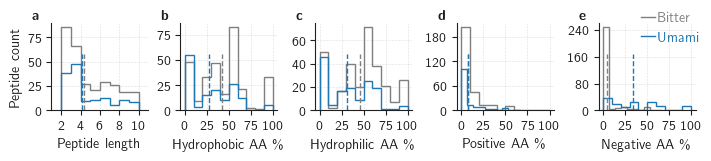

In [7]:
fig, ax = plt.subplots(1,
                       5,
                       figsize=(7, 1.5),
                       constrained_layout=True)
alpha_hist = 1
alpha_mean = 1
hist_lw = 1.0
mean_lw = 1.0

bitter_histstyle = {'histtype': 'step', 'alpha': alpha_hist,
                    'linestyle': 'solid', 'linewidth': hist_lw, 'color': bitter_color}
bitter_style = {'color': bitter_color, 'alpha': alpha_mean,
                'linestyle': 'dashed', 'linewidth': mean_lw}

umami_histstyle = {'histtype': 'step', 'alpha': alpha_hist,
                   'linestyle': 'solid', 'linewidth': hist_lw, 'color': umami_color}
umami_style = {'color': umami_color, 'alpha': alpha_mean,
               'linestyle': 'dashed', 'linewidth': mean_lw}

ymax = 0.65  # max y for the vertical mean line

# ----------------------------------------------------------------------------
# Length
# ----------------------------------------------------------------------------
# Setting 8 bins as the (integer) length varies from 2 to 10.

bitter.length.hist(ax=ax[0], bins=8, **bitter_histstyle)
umami.length.hist(ax=ax[0], bins=8, **umami_histstyle)

# Mean line
ax[0].axvline(bitter.length.mean(),
              ymax=ymax, **bitter_style)
ax[0].axvline(umami.length.mean(),
              ymax=ymax, **umami_style)

ax[0].set_xlabel('Peptide length')
ax[0].set_ylabel('Peptide count')

ax[0].set_xlim(1, 11)

# ----------------------------------------------------------------------------
# Hydrophobic percentage
# ----------------------------------------------------------------------------

bitter['hydChrg'].apply(lambda x: H_AA_percent(x)).hist(ax=ax[1],
                                                        **bitter_histstyle)

umami['hydChrg'].apply(lambda x: H_AA_percent(x)).hist(ax=ax[1],
                                                       **umami_histstyle)

ax[1].axvline(bitter['hydChrg'].apply(lambda x: H_AA_percent(x)).mean(),
              ymax=ymax, **bitter_style)
ax[1].axvline(umami['hydChrg'].apply(lambda x: H_AA_percent(x)).mean(),
              ymax=ymax, **umami_style)

ax[1].set_xlabel(r'Hydrophobic AA \%')
# ----------------------------------------------------------------------------
# Hydrophilic percentage
# ----------------------------------------------------------------------------

bitter['hydChrg'].apply(lambda x: P_AA_percent(x)).hist(ax=ax[2],
                                                        **bitter_histstyle)
umami['hydChrg'].apply(lambda x: P_AA_percent(x)).hist(ax=ax[2],
                                                       **umami_histstyle)
ax[2].axvline(bitter['hydChrg'].apply(lambda x: P_AA_percent(x)).mean(),
              ymax=ymax, **bitter_style)
ax[2].axvline(umami['hydChrg'].apply(lambda x: P_AA_percent(x)).mean(),
              ymax=ymax, **umami_style)


ax[2].set_xlabel(r'Hydrophilic AA \%')

# ----------------------------------------------------------------------------
# Positive percentage
# ----------------------------------------------------------------------------

bitter['hydChrg'].apply(lambda x: pos_AA_percent(x)).hist(ax=ax[3],
                                                          **bitter_histstyle)

umami['hydChrg'].apply(lambda x: pos_AA_percent(x)).hist(ax=ax[3],
                                                         **umami_histstyle)
ax[3].axvline(bitter['hydChrg'].apply(lambda x: pos_AA_percent(x)).mean(),
              ymax=ymax, **bitter_style)
ax[3].axvline(umami['hydChrg'].apply(lambda x: pos_AA_percent(x)).mean(),
              ymax=ymax, **umami_style)

ax[3].set_xlabel(r'Positive AA \%')

# ------------------------------------------------------------------------------
# Negative percentage
# ------------------------------------------------------------------------------

bitter['hydChrg'].apply(lambda x: neg_AA_percent(x)).hist(ax=ax[4],
                                                          **bitter_histstyle)

umami['hydChrg'].apply(lambda x: neg_AA_percent(x)).hist(ax=ax[4],
                                                         **umami_histstyle)

ax[4].axvline(bitter['hydChrg'].apply(lambda x: neg_AA_percent(x)).mean(),
              ymax=ymax, **bitter_style)
ax[4].axvline(umami['hydChrg'].apply(lambda x: neg_AA_percent(x)).mean(),
              ymax=ymax, **umami_style)

ax[4].set_xlabel(r'Negative AA \%')

# Create a legend not tied to data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

custom_lines = [
    Line2D([0], [0], color=bitter_color, lw=hist_lw),
    Line2D([0], [0], color=umami_color, lw=hist_lw)
]

fig.legend(custom_lines, ['Bitter', 'Umami'],
           handlelength=1,
           labelcolor='linecolor',
           frameon=False,
           handletextpad=.2, loc='upper right')

labels = [
    r'$\textbf{a}$', r'$\textbf{b}$', r'$\textbf{c}$', r'$\textbf{d}$',
    r'$\textbf{e}$'
]

for axis, label in zip(ax, labels):
    axis.text(-.2, 1.05, label, transform=axis.transAxes)
    axis.xaxis.set_major_locator(plt.MaxNLocator(5))
    axis.yaxis.set_major_locator(plt.MaxNLocator(4))
fig.savefig('../figures/fig2.pdf')
pass;

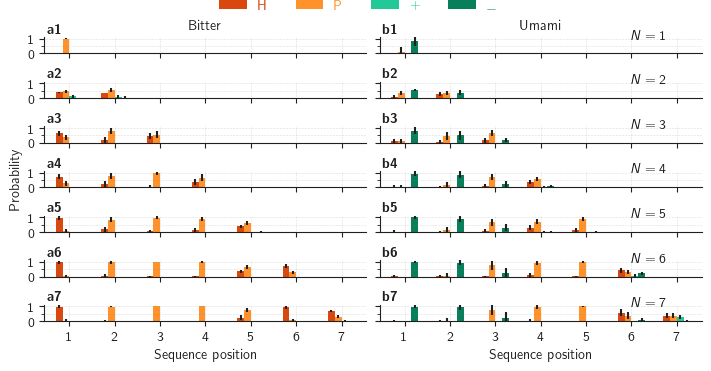

In [8]:
fig, ax = plt.subplots(7,
                       2,
                       figsize=(7, 3.5),
                       sharex=True,
                       sharey=True,
                       constrained_layout=True)

# Bitter
count = 0

for av, sem in zip(av_bitter_list, sem_bitter_list):
    av_bitter = av
    sem_bitter = sem
    av_bitter.plot(kind='bar',
                   width=.6,
                   color=av_bitter.columns.map(color_dict),
                   label=av_bitter.columns.map(label_dict),
                   legend=False,
                   yerr=sem_bitter * np.sqrt(499),  # std dev, not std err
                   rot=0,
                   ylim=[0, 1.1],
                   xlim=[1, 7],
                   ax=ax[count, 0])
    count += 1

# Umami
count = 0
for av, sem in zip(av_umami_list, sem_umami_list):
    av_umami = av
    sem_umami = sem
    #     print(av_umami.columns.map(color_dict))
    av_umami.plot(kind='bar',
                  width=.6,
                  color=av_umami.columns.map(color_dict),
                  label=av_umami.columns.map(label_dict),
                  legend=False,
                  yerr=sem_umami * np.sqrt(499),
                  rot=0,
                  ylim=[0, 1.1],
                  xlim=[1, 7],
                  ax=ax[count, 1])
    count += 1

ax[0, 0].set_title('Bitter')
ax[0, 1].set_title('Umami')

ax[6, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7])
ax[6, 1].set_xticklabels([1, 2, 3, 4, 5, 6, 7])
ax[6, 0].set_xlabel('Sequence position')
ax[6, 1].set_xlabel('Sequence position')

ax[3, 0].set_ylabel('Probability')
fig.legend(av_bitter.columns.map(label_dict),
           ncol=4,
           loc=(.3, .95),
           frameon=False,
           labelcolor='linecolor')
ALabels = [
    r'$\textbf{a1}$', r'$\textbf{a2}$', r'$\textbf{a3}$', r'$\textbf{a4}$',
    r'$\textbf{a5}$', r'$\textbf{a6}$', r'$\textbf{a7}$'
]
BLabels = [
    r'$\textbf{b1}$', r'$\textbf{b2}$', r'$\textbf{b3}$', r'$\textbf{b4}$',
    r'$\textbf{b5}$', r'$\textbf{b6}$', r'$\textbf{b7}$'
]

_ = 0

for alabel, blabel in zip(ALabels, BLabels):
    ax[_, 0].text(-.5, 1.4, alabel)
    ax[_, 1].text(-.5, 1.4, blabel)
    ax[_, 1].text(5, 1, f'$N={_+1}$')
    # Also add a grid line at y=0.5 to aid visualization
    ax[_, 0].set_yticks([0.5], minor=True)
    ax[_, 0].yaxis.grid(True, which='minor')
    ax[_, 1].set_yticks([0.5], minor=True)
    ax[_, 1].yaxis.grid(True, which='minor')
    _ += 1

fig.savefig('../figures/fig3.pdf', bbox_inches='tight')
pass;

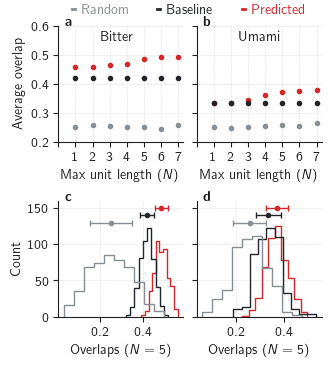

In [9]:
fig, ax = plt.subplots(2,
                       2,
                       figsize=(3.2, 3.5),
                       sharey='row',
                       constrained_layout=True)

for length, df in zip(max_lib_pep_length_list, perf_bitter_list):
    ax[0, 0].errorbar(length,
                      df['pred_ovlp_bitters_mean'].mean(),
                      yerr=df['pred_ovlp_bitters_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=pred_ovlp_col)
    ax[0, 0].errorbar(length,
                      df['all_H_ovlp_bitters_mean'].mean(),
                      yerr=df['all_H_ovlp_bitters_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=baseline_ovlp_col)
    ax[0, 0].errorbar(length,
                      df['rand_ovlp_bitters_mean'].mean(),
                      yerr=df['rand_ovlp_bitters_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=rand_ovlp_col)

for length, df in zip(max_lib_pep_length_list, perf_umami_list):
    ax[0, 1].errorbar(length,
                      df['pred_ovlp_umamis_mean'].mean(),
                      yerr=df['pred_ovlp_umamis_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=pred_ovlp_col)
    ax[0, 1].errorbar(length,
                      df['all_neg_ovlp_umamis_mean'].mean(),
                      yerr=df['all_neg_ovlp_umamis_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=baseline_ovlp_col)
    ax[0, 1].errorbar(length,
                      df['rand_ovlp_umamis_mean'].mean(),
                      yerr=df['rand_ovlp_umamis_mean'].sem(),
                      ecolor=ebar_color,
                      fmt='.',
                      c=rand_ovlp_col)

ax[0, 0].set_xticks(range(8))
ax[0, 0].set_xticklabels(["", 1, 2, 3, 4, 5, 6, 7])
ax[0, 1].set_xticks(range(8))
ax[0, 1].set_xticklabels(["", 1, 2, 3, 4, 5, 6, 7])
ax[0, 0].set_ylim(0.2, 0.6)
ax[0, 0].yaxis.set_major_locator(plt.MaxNLocator(4))

ax[0, 0].text(2.5, .55, 'Bitter')
ax[0, 1].text(2.5, .55, 'Umami')

ax[0, 0].set_ylabel('Average overlap')
ax[0, 0].set_xlabel('Max unit length ($N$)')
ax[0, 1].set_xlabel('Max unit length ($N$)')

custom_lines = [
    plt.Line2D([0], [0], color=rand_ovlp_col, lw=2),
    plt.Line2D([0], [0], color=baseline_ovlp_col, lw=2),
    plt.Line2D([0], [0], color=pred_ovlp_col, lw=2)
]
fig.legend(custom_lines, ['Random', 'Baseline', 'Predicted'],
           handlelength=.2,
           ncol=3,
           labelcolor='linecolor',
           frameon=False,
           handletextpad=.5,
           loc=(0.2, .94),
           labelspacing=.3)

# Plot the histograms for overlaps for training sets with max_lib_pep_len=5
perf_bitter = perf_bitter_max_lib_pep_length_5
ax[1, 0].hist(perf_bitter.pred_ovlp_bitters_mean,
              histtype='step',
              ec=pred_ovlp_col)
ax[1, 0].hist(perf_bitter.all_H_ovlp_bitters_mean,
              histtype='step',
              ec=baseline_ovlp_col)
ax[1, 0].hist(perf_bitter.rand_ovlp_bitters_mean,
              histtype='step',
              ec=rand_ovlp_col)

ax[1, 0].errorbar(perf_bitter.pred_ovlp_bitters_mean.mean(),
                  150,
                  xerr=perf_bitter.pred_ovlp_bitters_mean.std(),
                  fmt='.',
                  color=pred_ovlp_col,
                  capsize=2,
                  elinewidth=1)
ax[1, 0].errorbar(perf_bitter.all_H_ovlp_bitters_mean.mean(),
                  140,
                  xerr=perf_bitter.all_H_ovlp_bitters_mean.std(),
                  fmt='.',
                  color=baseline_ovlp_col,
                  capsize=2,
                  elinewidth=1)
ax[1, 0].errorbar(perf_bitter.rand_ovlp_bitters_mean.mean(),
                  130,
                  xerr=perf_bitter.rand_ovlp_bitters_mean.std(),
                  fmt='.',
                  color=rand_ovlp_col,
                  capsize=2,
                  elinewidth=1)

perf_umami = perf_umami_max_lib_pep_length_5

ax[1, 1].hist(perf_umami.pred_ovlp_umamis_mean,
              histtype='step',
              ec=pred_ovlp_col)
ax[1, 1].hist(perf_umami.all_neg_ovlp_umamis_mean,
              histtype='step',
              ec=baseline_ovlp_col)
ax[1, 1].hist(perf_umami.rand_ovlp_umamis_mean,
              histtype='step',
              ec=rand_ovlp_col)
ax[1, 1].errorbar(perf_umami.pred_ovlp_umamis_mean.mean(),
                  150,
                  xerr=perf_umami.pred_ovlp_umamis_mean.std(),
                  fmt='.',
                  color=pred_ovlp_col,
                  capsize=2,
                  elinewidth=1)
ax[1, 1].errorbar(perf_umami.all_neg_ovlp_umamis_mean.mean(),
                  140,
                  xerr=perf_umami.all_neg_ovlp_umamis_mean.std(),
                  fmt='.',
                  color=baseline_ovlp_col,
                  capsize=2,
                  elinewidth=1)
ax[1, 1].errorbar(perf_umami.rand_ovlp_umamis_mean.mean(),
                  130,
                  xerr=perf_umami.rand_ovlp_umamis_mean.std(),
                  fmt='.',
                  color=rand_ovlp_col,
                  capsize=2,
                  elinewidth=1)

ax[1, 0].set_ylim(0, 160)
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xlabel('Overlaps ($N=5$)')
ax[1, 1].set_xlabel('Overlaps ($N=5)$')

labels = [r'$\textbf{a}$', r'$\textbf{b}$', r'$\textbf{c}$', r'$\textbf{d}$']
for axis, label in zip(ax.flatten(), labels):
    axis.text(.05, 1, label, transform=axis.transAxes)

fig.savefig('../figures/fig4.pdf', bbox_inches='tight')
pass;